# **INDIAN STARTUP ECOSYSTEM**

## Project Description
We embark on a journey of discovery as we leverage our data analysis expertise to uncover the untapped potential within the Indian startup ecosystem. This project is designed to not only decode the numbers but to distill insights that will guide our team towards a successful foray into this dynamic market.

## Scope of Work

- Conduct a thorough exploration of datasets, dissecting funding patterns, sectoral nuances, and geographical hotspots in the Indian startup landscap
- Analyze funding received by startups in india from 2018 to 2021



## Hypothesis 

**Null Hypothesis (H0)**: There is no significant relationship between funding and the sector  

**Alternative Hypothesis (H1)**: There is a significant relationship between funding and the sector

## Questions 
1. How does funding vary across different industry sectors in India?
2. How does funding vary with the loaction of the start-ups
3. What is the relationship between the amount of funding and the stage of the company?
4. How have funding trends evolved between 2018 and 2021?
5. What are the most attractive sectors for investors?
6. Does the location of the company influence its sector?




# **DATA EXPLORATION, DATA UNDERSTANDING and DATA ANALYSIS**

In [1]:
# Load libraries
# Database connnection
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import f_oneway
from matplotlib.dates import YearLocator
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker




# filter warnings
import warnings 
warnings.filterwarnings('ignore')

# **1. Loading and Inspection of Data**

## **1.1 Loading data from the SQL server**

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [3]:
# Create a connection string

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
    
connection = pyodbc.connect(connection_string)



In [4]:
# sql query to get 2020 data. 
query_2020="SELECT * FROM dbo.LP1_startup_funding2020"

# sql query to get 2021 data. 
query_2021="SELECT * FROM dbo.LP1_startup_funding2021"

In [5]:
    # load 2021 data
data_2021=pd.read_sql(query_2021,connection)

    # load 2020 data
data_2020=pd.read_sql(query_2020,connection)

## **1.2 Loading CSV Files**

In [6]:
# load 2019 data
data_2019=pd.read_csv(r'C:\Users\iamde\OneDrive\Desktop\jupyter\india_startup_data\startup_funding2019.csv')

    # load 2018 data
data_2018=pd.read_csv(r'C:\Users\iamde\OneDrive\Desktop\jupyter\india_startup_data\startup_funding2018.csv')


# **2.Exploratory Data Analaysis(EDA)**

## **2.0.  2018 Dataset EDA**

In [7]:
# preview the rows and columns for the 2018 dataset
data_2018.sample(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
203,Tricog Health Services Pvt Ltd,"Health Care, Health Diagnostics, Predictive An...",Series A,4000000,"Bangalore, Karnataka, India",Predictive Healthcare Analytics Company
512,srJna,Education,Seed,—,"Jaipur, Rajasthan, India","SRJNA is a brand of Elation Edtech Pvt. Ltd., ..."
519,Dailyhunt,"Information Technology, Mobile, News, Operatin...",Series E,6000000,"Bangalore, Karnataka, India",NewsHunt is a Bangalore based eBooks company.
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
216,CollPoll,Education,Seed,—,"Bangalore, Karnataka, India",World-class Enterprise System for Education.


In [8]:
# checking for number of columns and rows
print (data_2018.shape)
print(f"There are {data_2018.shape[0]} rows, and {data_2018.shape[1]} columns")

(526, 6)
There are 526 rows, and 6 columns


In [9]:
# checking info
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [10]:
# Describing the data
data_2018.describe()

,Company Name,Industry,Round/Series,Amount,Location,About Company
count,526,526,526,526,526,526
unique,525,405,21,198,50,524
top,TheCollegeFever,—,Seed,—,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
freq,2,30,280,148,102,2


**Findings**  
- TheCollegeFever company was the most common company  

- Seed series was the most preffered  

- most companies were based in Bangalore location  

In [11]:
# checking for duplicates
print("There are ",data_2018.duplicated().sum(),"duplicate(s)")

There are  1 duplicate(s)


In [12]:
# Checking for missing values
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

## **2.1. 2019 EDA**

In [13]:
# get a sample of 2019 dataset
data_2019.sample(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.","$1,000,000",Pre series A
15,LivFin,2017.0,Delhi,Fintech,"Grants small business loans, supply chain fina...",Rakesh Malhotra,German development finance institution DEG,"$5,000,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
46,Rein Games,NaN,Noida,Technology,"It develops, publishes and distributes games a...","Vaibhav Gupta, Himanshu Devra, Pranav Chaudhar...",Manipal Education and Medical Group (MEMG) fam...,"$50,000,000",Pre series A
60,Ecom Express,2012.0,Gurugram,Logistics,It is a technology enabled logistics solutions...,"Krishnan, Manju Dhawan, K Satyanarayana, Sanje...",CDC Group,"$36,000,000",NaN


In [14]:
# checking for number of columns and rows
print (data_2019.shape)
print(f"There are {data_2019.shape[0]} rows, and {data_2019.shape[1]} columns")

(89, 9)
There are 89 rows, and 9 columns


In [15]:
# checking for duplicates
print("There are ",data_2019.duplicated().sum(),"duplicate(s)")

There are  0 duplicate(s)


In [16]:
# Checking for nulls
data_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [17]:
# checking for datatypes in the different columns
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [18]:
# performing descriptive analysis
data_2019.describe(include='all')

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
count,89,60.000000,70,84,89,86,89,89,43
unique,87,NaN,17,52,88,85,86,50,15
top,Kratikal,NaN,Bangalore,Edtech,Online meat shop,"Vivek Gupta, Abhay Hanjura",Undisclosed,Undisclosed,Series A
freq,2,NaN,21,7,2,2,3,12,10
mean,NaN,2014.533333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Findings**
- Kratikal company was the most common company

- Most companies had their headquarters based in Bangalore

- Majority of the companies are involved in the Edtech sector

## **2.2. 2020 EDA**

In [19]:
# get a sample of 2020 dataset
data_2020.sample(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
876,Umeed Housing,NaN,Haryana,Fintech,Housing finance company,Ashutosh Sharma,Morgan Stanley Private Equity Asia,23000000.0,Series D,None
878,Flick Stree,NaN,Mumbai,AI & Media,Artificial intelligence-based video publishing...,Saurabh Singh,Samsung Venture Investment,3000000.0,Series A,None
243,Supplynote,2015.0,Noida,SaaS startup,Supplynote is India's leading procurement plat...,"Abhishek Verma, Harshit Mittal, Kumar Kushang,...","MOX, SOSV",500000.0,Seed,None
647,Jiffy ai,2018.0,None,AI,Enterprise automation startup,Babu Sivadasan,Nexus Venture Partners,18000000.0,Series A,None
530,Chingari,2018.0,Bangalore,Media,Short video platform,"Biswatma Nayak, Siddharth Gautam","AngelList India, Utsav Somani, Village Global,...",1300000.0,Seed round,None


In [20]:
#checking for number of columns and rows
print (data_2020.shape)
print(f"There are {data_2020.shape[0]} rows, and {data_2020.shape[1]} columns")

(1055, 10)
There are 1055 rows, and 10 columns


In [21]:
# checking for duplicates
print("There are ",data_2020.duplicated().sum(),"duplicate(s)")

There are  3 duplicate(s)


In [22]:
# Checking for nulls
data_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [23]:
# checking for datatypes in the different columns
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [24]:
# Describe the data
data_2020.describe(include='all')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
count,1055,842.000000,961,1042,1055,1043,1017,8.010000e+02,591,2
unique,905,NaN,77,302,990,927,848,NaN,42,2
top,Nykaa,NaN,Bangalore,Fintech,Provides online learning classes,Falguni Nayar,Venture Catalysts,NaN,Series A,Pre-Seed
freq,6,NaN,317,80,4,6,20,NaN,96,1
mean,NaN,2015.363420,NaN,NaN,NaN,NaN,NaN,1.130430e+08,NaN,NaN
std,NaN,4.097909,NaN,NaN,NaN,NaN,NaN,2.476635e+09,NaN,NaN
min,NaN,1973.000000,NaN,NaN,NaN,NaN,NaN,1.270000e+04,NaN,NaN
25%,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,NaN
50%,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,3.000000e+06,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,1.100000e+07,NaN,NaN


**Findings**  
- Nykaa company was the most common company  

- Majority of the companies had their headquarter at Bangalore  

- The average Amount invested was 113042969.54

## **2.3. 2021 EDA**

In [25]:
# get a sample of 2021 dataset
data_2021.sample(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1038,BankSathi,2020.0,New Delhi,Financial Services,BankSathi is a Fintech platform to empower con...,Jitendra Dhaka,"Dinesh Godara, Anuj Ahuja, Aditya",$500000,None
1133,Enercomp,2013.0,Ahmedabad,Information Technology & Services,Enercomp Solutions Pvt Ltd provide drone based...,SURESH SHAHDADPURI,ah! Ventures,$200000,None
968,Rebel Foods,2011.0,Mumbai,Cloud kitchen,World’s largest internet restaurant company. B...,"Jaydeep Barman, Kallol Banerjee.",Qatar Investment Authority,$175000000,Series F
248,FanAnywhere,2021.0,Bangalore,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",$Undisclosed,Seed
654,RenewBuy,2015.0,Gurugram,Insuretech,Simplest way to renew car insurance. Get quote...,"Balachander Sekhar, Sandeep Nanda","Lok Capital, IIFL Asset Management",$45000000,Series C


In [26]:
# get the number of rows and columns for the datasets
print(f'{data_2021.shape}')

print(f"The 2021 dataset has {data_2021.shape[0]} rows and {data_2021.shape[1]} Columns")

(1209, 9)
The 2021 dataset has 1209 rows and 9 Columns


In [27]:
# checking for duplicates
print("There are ",data_2021.duplicated().sum(),"duplicate(s)")

There are  19 duplicate(s)


In [28]:
#  Checking for nulls
data_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [29]:
# checking for datatypes in the different columns
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [30]:
# Describe the dataset
data_2021.describe(include='all')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
count,1209,1208.000000,1208,1209,1209,1205,1147,1206,781
unique,1033,NaN,70,254,1143,1095,937,278,31
top,BharatPe,NaN,Bangalore,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,$Undisclosed,Seed
freq,8,NaN,426,122,4,7,24,73,246
mean,NaN,2016.655629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.517364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1963.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Findings**  
- BharatPe is the most common company  

- Most companies invested in the FinTech sector  

- Majority of the companies were found in Bangalore  


**Overall Observations:**  
**Issues with the data**

1. There is a discrepancy in the naming conventions between the columns in the 2018 and 2019 datasets compared to the 2020 and 2021 datasets.

2. The 2018 dataset exhibits some missing columns, contributing to an incomplete representation of the data.

3. Conversely, the 2020 dataset contains an additional column that appears to be extraneous and does not serve a meaningful purpose in our analysis.

**Course of Action:**

1. **Missing Column Engineering for 2018:**
   - We will address the absence of certain columns in the 2018 dataset by employing data engineering techniques to create and populate the missing columns, ensuring a comprehensive and consistent dataset.

2. **Column Name Standardization:**
   - To establish uniformity and coherence across all datasets, we will embark on a column renaming process for the 2018 and 2019 datasets. This action aims to align the naming conventions with those observed in the 2020 and 2021 datasets, facilitating seamless data integration and analysis.

3. **Extraneous Column Removal in 2020:**
   - The redundant column identified in the 2020 dataset will be removed, streamlining the dataset and eliminating unnecessary elements that do not contribute to the overall analysis objectives.

These actions collectively enhance the integrity, consistency, and completeness of the dataset, paving the way for a more robust and coherent analytical process.
ical process.







# **3. Data Cleaning and Preparation**

## **3.1. Convert Indian Rupee values in the 2018 data to dollars**


In [31]:
# Replace '₹', commas, '—', and "''" in 'Amount' column
data_2018['Amount'] = data_2018['Amount'].str.replace(',', '').str.replace('—', '').str.replace("''",'').replace('', np.nan)

# Conditionally apply multiplication only where '₹' is present
mask = data_2018['Amount'].str.contains('₹', na=False)
data_2018.loc[mask, 'Amount'] = data_2018.loc[mask, 'Amount'].str.replace('₹', '').astype(float) * 0.0146

### **Add year data was collected**

- There is need to add a column that represents the year each dataset was collected. This will help with handling the datasets after merging the dataframes 


In [32]:
# add year when data was collected column to every dataset
data_2018['year'] = pd.to_datetime('2018', format='%Y').year
data_2019['year'] = pd.to_datetime('2019', format='%Y').year
data_2020['year'] = pd.to_datetime('2020', format='%Y').year
data_2021['year'] = pd.to_datetime('2021', format='%Y').year

In [33]:
def concat_dataframes(data,data1, data2, data3):
    """
    Concatenates four dataframes along the row axis.

    Parameters:
    data (pandas.DataFrame): The first dataframe to concatenate.
    data1 (pandas.DataFrame): The second dataframe to concatenate.
    data2 (pandas.DataFrame): The third dataframe to concatenate.
    data3 (pandas.DataFrame): The fourth dataframe to concatenate.

    Returns:
    pandas.DataFrame: The concatenated dataframe.
    """
    # Rename columns to make them consistent across dataframes
    df1 = data.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series', 'year' : 'year'})
    df2 = data1.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series','year' : 'year'})
    df3 = data2.rename(columns={'Company/Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What it does': 'about_company','Founders':'founders','Investor':'investor','Amount($)':'amount','Stage':'series','year' : 'year'})
    df4 = data3.rename(columns={'Company Name': 'company_brand','Location': 'headquarter','Industry': 'sector','About Company': 'about_company','Amount':'amount','Round/Series':'series','year' : 'year'})

    # Concatenate dataframes along the row axis
    result = pd.concat([df1, df2, df3,df4], axis=0).reset_index(drop=True)

    return result

## **Concatenate the dataframes**

In [34]:
# concating the dataframes
df= concat_dataframes(data_2021,data_2020,data_2019,data_2018)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2765 non-null   object 
 3   sector         2861 non-null   object 
 4   about_company  2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2474 non-null   object 
 8   series         1941 non-null   object 
 9   year           2879 non-null   int64  
 10  column10       2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


In [36]:
#Drop the extreneous column 10
df.drop('column10', axis=1, inplace= True)

## **Cleaning 'Amount' column**

**Notes**  
- Remove all currency signs  

- Remove all other umwanted characters, words and symbols  

- Fill the nulls uning interpolate method 

- Convert the column from object to float

In [37]:
df['amount']=df['amount'].replace('\$','',regex=True)
df['amount']=df['amount'].replace(['Undisclosed','undisclosed',None],np.NAN)
df['headquarter']=df['headquarter'].str.strip('\t#REF!')
df['amount']=df['amount'].replace('\,','',regex=True)
df['amount']=df['amount'].replace(",","")



In [38]:
# fix index 242
df.at[242, 'headquarter'] = None
df.at[242, 'sector'] = 'Pharmaceuticals'
df.at[242, 'founders'] = 'Varun Khanna'
df.at[242, 'investor'] = 'Morgan Stanley Private Equity Asia'
df.at[242, 'amount'] = '22000000'
df.at[242, 'series'] = 'Series C'
df.at[242, 'about_company'] = 'Development and Manufacturing'

# drop the duplicate row
df = df.drop(256, axis=0, errors='ignore')

# fix index 1148
df.at[1148, 'sector'] = 'Logistics'
df.at[1148, 'founders'] ='Basant Kumar' 
df.at[1148, 'investor'] =None
df.at[1148, 'amount'] = 1000000
df.at[1148, 'series'] = 'Seed'
 
# fix index 257
df.at[257, 'sector'] = 'Transport'
df.at[257, 'founders'] ='Anshuman Maheshwary'
df.at[257, 'investor'] =None
df.at[257, 'amount'] = 5000000
df.at[257, 'series'] = 'Seed'

# fix index 98
df.at[98, 'sector'] = 'Computer Games'
df.at[98, 'founders'] ='Pritesh Kumar'
df.at[98, 'investor'] =None
df.at[98, 'amount'] = 1200000
df.at[98, 'series'] = 'Seed'

# drop the duplicate column
df = df.drop(111, axis=0, errors='ignore')

# fix index 677
df.at[677, 'amount'] = 1000000
df.at[677, 'series'] = 'Angel'

# fix index 545
df.at[545, 'investor'] =None
df.at[545, 'amount'] = 1000000
df.at[545, 'series'] = 'Pre-series A'

# fix index 538
df.at[538, 'investor'] =None
df.at[538, 'amount'] = 300000
df.at[538, 'series'] = 'Pre-Seed'

# fix index 551
df.at[551,'amount']=300000
df.at[551,'series']=None

# fix index 674
df.at[674,'amount']=6000000
df.at[674,'series']=None

# fix index 2531
df.at[2531,'amount']=None
df.at[2531,'series']=None


In [39]:
# change the amount column to numeric
df['amount']=pd.to_numeric(df['amount'])

## **Cleaning data_year column**

**Notes**  


- Convert data type to period


In [40]:
# Convert the data_year column to date
df['year']=pd.to_datetime(df['year'], format='%Y')
# df['year']=df['year'].dt.to_period('y')
df['founded']=pd.to_datetime(df['founded']).dt.year

In [41]:
# check for nulls and duplicated
print(f"There are {df['year'].isna().sum()} Null values in the 'year' column")

There are 0 Null values in the 'year' column


In [42]:
df['year'].info()

<class 'pandas.core.series.Series'>
Index: 2877 entries, 0 to 2878
Series name: year
Non-Null Count  Dtype         
--------------  -----         
2877 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 109.5 KB


## **Cleaning 'founded' column**

**Notes**
- Handle nulls by populating with the 'bfill' method



In [43]:
print(f"There are {df['founded'].isna().sum()} Null values in the 'founded' column")

There are 769 Null values in the 'founded' column


**Notes**  
- There are 769 null values in the 'founded' column.  

- Since dropping the nulls will lead to a significant loss of our data, Backward fill will be used to fill the null values

**COURSE OF ACTION**

- We will be cleaning the missing values by fill them using interpolate method which is suitable for time series data  

- We will also be converting the data type from float to datetime for purpose of our analysis.

In [44]:
# Fill the nulls
df["founded"].interpolate(method='linear',inplace= True)

print(f"There are {df['founded'].isna().sum()} missing values")

There are 0 missing values


In [45]:
# Convert to datetime
df['founded'] = pd.to_datetime(df['founded'], format='%Y')

# Convert to period
df['founded'] = df['founded'].dt.to_period('Y')


In [46]:
df['founded'].info()

<class 'pandas.core.series.Series'>
Index: 2877 entries, 0 to 2878
Series name: founded
Non-Null Count  Dtype        
--------------  -----        
2877 non-null   period[Y-DEC]
dtypes: period[Y-DEC](1)
memory usage: 109.5 KB


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   company_brand  2877 non-null   object        
 1   founded        2877 non-null   period[Y-DEC] 
 2   headquarter    2762 non-null   object        
 3   sector         2859 non-null   object        
 4   about_company  2877 non-null   object        
 5   founders       2332 non-null   object        
 6   investor       2246 non-null   object        
 7   amount         2320 non-null   float64       
 8   series         1941 non-null   object        
 9   year           2877 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7), period[Y-DEC](1)
memory usage: 311.8+ KB


## **Cleaning the 'founders' column**

In [48]:
# Remove unwanted characters
df['founders'] = df['founders'].replace(['...', np.nan], np.NaN)

# Check the number of NaN values in the 'founders' column
nan_count = df['founders'].isna().sum()

print(nan_count)

545


In [49]:
df['founders'].info()

<class 'pandas.core.series.Series'>
Index: 2877 entries, 0 to 2878
Series name: founders
Non-Null Count  Dtype 
--------------  ----- 
2332 non-null   object
dtypes: object(1)
memory usage: 109.5+ KB


## **Cleaning **Stage** column**

Startups start with pre-seed, progress through seed, Series A, Series B, etc., securing resources for development and strategies. Additional rounds like Series C or D may follow. External funding at each stage fuels growth toward the venture's full potential.

link: https://www.startupindia.gov.in/content/sih/en/funding.html

| Stages          | Description                                                           |
|-----------------|-----------------------------------------------------------------------|
| Others          | Miscellaneous phases or unique development activities.                 |
| Early Traction  | Gaining initial traction, attracting early adopters, and refining based on feedback. |
| Validation      | Validating the business model, product-market fit, and scalability through research and feedback. |
| Ideation        | Brainstorming and developing business concepts, defining value propositions, and outlining plans. |
| Scaling         | Expanding operations, customer base, and market reach for rapid growth. |
| Exit Option     | Considering exit strategies such as mergers, acquisitions, or IPOs.     |


In [74]:
# Replace Ideation stages
df['series'] = df['series'].replace(['Pre-seed', 'resh funding','Pre-seed Round','Pre seed round', 'Pre-Seed', 'arly seed',
                                     'Pre seed Round'], 'Ideation')

# Replace Validation stages
df['series'] = df['series'].replace(['Seed', 'Seed+', 'Angel Round','Seed A', 'Angel', 'Seed Funding', 'Seed round', 
                                     'Seed Round & Series A', 'Seed Investment', 'Seed funding', 'Seed Round','Seed fund'], 'Validation')

# Replace Early Traction stages
df['series'] = df['series'].replace(['Series A', 'Series A+', 'Series A-1', 'Series A1', 'Series A2',
                                     'Early Seed', 'Series B', 'Series B2', 'Series B3', 'Series C',
                                     'Series C, D', 'Series D', 'Series D1', 'Series E2', 'Series F1',
                                     'Series F2', 'Series G', 'Series H', 'Series I'], 'Early Traction')

# Replace Scaling stages
df['series'] = df['series'].replace(['Mid series', 'Series B+', 'Private Equity', 'Venture - Series Unknown'], 'Scaling')

# Replace Exit Option stages
df['series'] = df['series'].replace(['Post series A', 'Post-IPO Debt', 'Post-IPO Equity'], 'Exit Option')

# Replace Others
df['series'] = df['series'].replace(['P', 'Pre-series', 'Pre-series A', 'Seies A', 'Pre- series A','dge','Pre-series A1', 'Pre-series B',
                                     'Pre-series C', 'Pre-Series B', 'Bridge', 'Bridge Round','Pre series B',
                                    'Corporate Round', 'Debt', 'Debt Financing','unding Round',
                                     'Undisclosed', 'Secondary Market', 'Non-equity Assistance',
                                     'Fresh funding', 'Grant',  'Series ','unding Round','Pre series C','Pre Series A', 'Pre series A1', 'Pre series A',
                                     'Funding Round',None], 'Others')

In [51]:
# fix index 551
df.at[551,'amount']=300000
df.at[551,'series']=None

# fix index 674
df.at[674,'amount']=6000000
df.at[674,'series']=None

# fix index 2531
df.at[2531,'amount']=None
df.at[2531,'series']=None

In [52]:
# strip off characters 
df['series'] = df['series'].str.strip('\t#REF!')

## **Cleaning the Sector Column**

In [53]:
# Get the first sentence of every list
df['sector']=df['sector'].str.split(",").str[0]

In [72]:

# Replace the sector values using the provided formula
df['sector'] = df['sector'].replace(['AI startup', 'AI Chatbot', 'AI Company', 'AI platform', 'AI Platform', 'AI Startup', 'Artificial Intelligence'], 'Artificial Intelligence')
df['sector'] = df['sector'].replace(['EdTech', 'EdTech Startup', 'EdtTech', 'Edtech'], 'Education Technology')
df['sector'] = df['sector'].replace(['B2B E-commerce', 'E-commerce', 'B2B Ecommerce','Commerce','B2B marketplace', 'B2B Marketplace'], 'Business-to-Business E-commerce')
df['sector'] = df['sector'].replace(['FinTech'], 'Fintech')
df['sector'] = df['sector'].replace(['Home services'], 'Home Services')
df['sector'] = df['sector'].replace(['HealthTech', 'Healthtech', 'Healtcare', 'HeathTech','Alternative Medicine', 'Health care','Helathcare', 'Healthcare', 'Health', 'Hospital & Health Care', 'Heathcare'], 'Healthcare')
df['sector'] = df['sector'].replace(['Tech Startup', 'Tech startup', 'IT startup', 'Technology Startup'], 'Technology Startup')
df['sector'] = df['sector'].replace(['B2B service'], 'Business-to-Business Services')
df['sector'] = df['sector'].replace(['Renewable Energy'], 'Renewable Energy')
df['sector'] = df['sector'].replace(['Electronics'], 'Electronics')
df['sector'] = df['sector'].replace(['Food & Beverages', 'Food and Beverages', 'Food', 'Food Production', 'Food Industry', 'Food tech', 'Foodtech', 'FoodTech', 'Food Startup', 'Food & tech', 'Food diet', 'Food Processing', 'Food and Beverage', 'Food delivery', 'Food Delivery', 'Food & Logistics', 'Food devlivery', 'QSR startup'], 'Food and Beverages')
df['sector'] = df['sector'].replace(['Aeorspace', 'Aerospace', 'Aviation', 'Aviation & Aerospace', 'Aero company'], 'Aerospace')
df['sector'] = df['sector'].replace(['Deep Tech', 'Deeptech'], 'Deep Technology')
df['sector'] = df['sector'].replace(['Dating', 'Dating app'], 'Dating Services')
df['sector'] = df['sector'].replace(['Gaming', 'Computer Games', 'Mobile Games', 'Games', 'E-Sports', 'Gaming startup'], 'Gaming')
df['sector'] = df['sector'].replace(['Robotics', 'Robotics & AI'], 'Robotics')
df['sector'] = df['sector'].replace(['Retail', 'Reatil startup', 'Retail Startup', 'Retail Tech'], 'Retail')
df['sector'] = df['sector'].replace(['Oil and Energy', 'Oil & Energy'], 'Oil and Energy')
df['sector'] = df['sector'].replace(['AgriTech', 'Agritech', 'Agritech startup', 'AgTech', 'Agri tech', 'B2B Agritech', 'Agricultural Technology'], 'Agricultural Technology')
df['sector'] = df['sector'].replace(['Telecommuncation', 'Telecommunication', 'Telecommunications'], 'Telecommunications')
df['sector'] = df['sector'].replace(['Milk startup', 'Dairy startup', 'Dairy'], 'Dairy')
df['sector'] = df['sector'].replace(['IT', 'Information Technology', 'Information Technology & Services', 'Information Technology Company', 'Information Technology and Services', 'IT company'], 'Information Technology')
df['sector'] = df['sector'].replace(['Logistics', 'Logistics & Supply Chain', 'Logistics and Supply Chain'], 'Logistics and Supply Chain')
df['sector'] = df['sector'].replace(['Hospitality'], 'Hospitality')
df['sector'] = df['sector'].replace(['Fashion', 'Fashion & Lifestyle', 'Fashion and lifestyle', 'Fashion startup', 'Fashion Tech', 'Apparel & Fashion', 'Apparel and Fashion', 'Clothing', 'D2C Fashion', 'D2C jewellery'], 'Fashion and Lifestyle')
df['sector'] = df['sector'].replace(['Marketing', 'Marketing & Advertising', 'Marketing and Advertising', 'MarTech', 'Marketing Technology', 'Advertisement', 'Advertising', 'Marketing company', 'Marketing startup'], 'Marketing and Advertising')
df['sector'] = df['sector'].replace(['Transportation', 'Transport', 'Mobility', 'Mobility/Transport', 'Mobility tech', 'Auto-tech', 'Logitech', 'Transport & Rentals', 'Transport Automation', 'Transportation-as-a-Service Startup', 'TaaS startup', 'Automotive and Rentals', 'IoT/Automobile', 'Automobile Technology', 'Mobility', 'Last Mile Transportation', 'Micro-mobiity'], 'Transportation and Mobility')
df['sector'] = df['sector'].replace(['LegalTech', 'Legaltech', 'Legal Services', 'Legal tech', 'Legaltech'], 'Legal Technology')
df['sector'] = df['sector'].replace(['Automotive', 'Automobile', 'Automotive Startup', 'Automotive company', 'Car Trade', 'Automotive tech', 'Vehicle repair startup', 'Car Service', 'Luxury car startup'], 'Automotive')
df['sector'] = df['sector'].replace(['SaaS startup', 'SaaS', 'SaaS platform', 'Software-as-a-Service', 'Software-as-a-Service Platform', 'Software-as-a-Service Startup', 'SaaS\xa0\xa0startup'], 'Software-as-a-Service')
df['sector'] = df['sector'].replace(['Fantasy sports', 'Fantasy Sports'], 'Fantasy Sports')
df['sector'] = df['sector'].replace(['Video communication', 'Video platform', 'Video', 'Video sharing platform', 'Video streaming platform', 'Video personalization'], 'Video')
df['sector'] = df['sector'].replace(['Social Media', 'Social network', 'Social Networking', 'Social commerce', 'Social community', 'Social Network', 'Social e-commerce', 'Social media', 'Social platform', 'Social audio'], 'Social Media')
df['sector'] = df['sector'].replace(['Skill development', 'Skills Development', 'Professional Training & Coaching', 'Professional Training and Coaching'], 'Skills Development and Professional Training')
df['sector'] = df['sector'].replace(['Rental', 'Rental Services', 'Rental space', 'Bike Rental', 'Furniture Rental'], 'Rental Services')
df['sector'] = df['sector'].replace(['Recruitment', 'Job discovery platform', 'Job portal', 'Staffing & Recruiting', 'Staffing and Recruiting', 'Recruitment startup'], 'Recruitment and Staffing')
df['sector'] = df['sector'].replace(['Sports', 'SportsTech', 'Sports Technology', 'sports','Sports startup'], 'Sports and Sports Technology')
df['sector'] = df['sector'].replace(['Consumer Goods', 'Consumer goods', 'Consumer software', 'Consumer service', 'Consumer Services', 'Consumer', 'Consumer Applications', 'Consumer appliances', 'Consumer Electronics'], 'Consumer Goods and Services')
df['sector'] = df['sector'].replace(['HRTech', 'HR Tech', 'HR Tech startup', 'Human Resources', 'Human Resources Technology', 'HRTech', 'HR tech', 'HR'], 'Human Resources and HR Technology')
df['sector'] = df['sector'].replace(['Wine & Spirits'], 'Wine and Spirits')
df['sector'] = df['sector'].replace(['Mechanical & Industrial Engineering', 'Mechanical and Industrial Engineering', 'Mechanical Or Industrial Engineering'], 'Mechanical and Industrial Engineering')
df['sector'] = df['sector'].replace(['Spiritual', 'Linguistic Spiritual'], 'Spirituality')
df['sector'] = df['sector'].replace(['Financial Services', 'Banking', 'Capital Markets','Finance', 'Finance company', 'Investment Banking', 'Investment Management', 'Finance', 'Finance company', 'Financial Technology', 'FinTech', 'Digital mortgage', 'Online financial service', 'Online credit management startup', 'Trading platform', 'Virtual Banking'], 'Financial Services')
df['sector'] = df['sector'].replace(['Industrial Automation'], 'Industrial Automation')
df['sector'] = df['sector'].replace(['IoT', 'Internet of Things', 'IoT platform', 'IoT startup', 'Internet of Things Platform', 'Internet of Things Startup'], 'Internet of Things')
df['sector'] = df['sector'].replace(['Computer software', 'Computer Software', 'Software', 'Software company', 'Software Startup'], 'Computer Software')
df['sector'] = df['sector'].replace(['Furniture', 'Home Decor', 'Interior Design'], 'Furniture and Home Decor')
df['sector'] = df['sector'].replace(['Location Analytics'], 'Location Analytics')
df['sector'] = df['sector'].replace(['Media', 'Online Media', 'Podcast', 'Podcasting', 'Content publishing', 'Publication', 'Digital Media', 'Media and Entertainment', 'Broadcasting', 'News', 'Digital Entertainment', 'Media Tech', 'Visual Media', 'Online Portals', 'Content creation', 'Content Management', 'Content Marktplace'], 'Media and Entertainment')
df['sector'] = df['sector'].replace(['Consumer Electronics'], 'Consumer Electronics')
df['sector'] = df['sector'].replace(['Tobacco'], 'Tobacco')
df['sector'] = df['sector'].replace(['Insuretech', 'Insurance Technology', 'Insurtech', 'InsureTech', 'Insurance'], 'Insurance')
df['sector'] = df['sector'].replace(['MLOps platform'], 'Machine Learning Operations')
df['sector'] = df['sector'].replace(['Venture Capital', 'Venture Capital & Private Equity', 'Venture Capital and Private Equity', 'Venture capitalist'], 'Venture Capital')
df['sector'] = df['sector'].replace(['Pet care', 'Veterinary', 'Veterinary Services'], 'Pet Care and Veterinary Services')
df['sector'] = df['sector'].replace(['Drone', 'Drone Technology'], 'Drone Technology')
df['sector'] = df['sector'].replace(['Wholesale'], 'Wholesale')
df['sector'] = df['sector'].replace(['Construction', 'Construction tech'], 'Construction and Construction Technology')
df['sector'] = df['sector'].replace(['E-learning', 'E-learning', 'Education Management'], 'E-learning and Education Management')
df['sector'] = df['sector'].replace(['OTT', 'Over-the-Top Media Services'], 'Over-the-Top Media Services')
df['sector'] = df['sector'].replace(['Computer & Network Security', 'Computer and Network Security', 'Cybersecurity'], 'Computer and Network Security')
df['sector'] = df['sector'].replace(['Social network', 'Social Networking', 'Social Network', 'Social community', 'Social platform'], 'Social Networking and Community Platforms')
df['sector'] = df['sector'].replace(['Music', 'Music Streaming'], 'Music and Music Streaming')
df['sector'] = df['sector'].replace(['Hauz Khas'], 'Hauz Khas')
df['sector'] = df['sector'].replace(['Pharmaceuticals', 'Pharmaceutical', 'Pharma', 'Biopharma', 'Pharmaceuticals'], 'Pharmaceuticals')
df['sector'] = df['sector'].replace(['Cosmetics', 'Beauty products', 'Personal Care', 'Beauty & wellness', 'Personal care startup', 'Skincare startup'], 'Cosmetics, Personal Care, and Beauty Products')
df['sector'] = df['sector'].replace(['Real Estate', 'Real estate', 'Commercial Real Estate', 'Housing Marketplace', 'Proptech', 'Property Technology'], 'Real Estate and Property Technology')
df['sector'] = df['sector'].replace(['Digital platform', 'Digital Platform'], 'Digital Platforms')
df['sector'] = df['sector'].replace(['NFT Marketplace', 'Non-Fungible Token Marketplace', 'NFT', 'Non-Fungible Tokens'], 'NFT and Non-Fungible Tokens')
df['sector'] = df['sector'].replace(['SpaceTech', 'Spacetech', 'Space Technology', 'Defense & Space'], 'Space Technology and Defense')
df['sector'] = df['sector'].replace(['Fishery'], 'Fishery')
df['sector'] = df['sector'].replace(['Renewables & Environment', 'Renewable Energy and Environmental Services', 'Environmental Services', 'Environmental service', 'Clean Technology', 'CleanTech', 'Pollution control equiptment'], 'Renewable Energy, Environmental Services, and Clean Technology')
df['sector'] = df['sector'].replace(['Online storytelling'], 'Online Storytelling')
df['sector'] = df['sector'].replace(['CRM', 'Customer Relationship Management'], 'Customer Relationship Management')
df['sector'] = df['sector'].replace(['Nutrition', 'Nutrition sector', 'Nutrition tech', 'Nutrition Tech', 'Food & Nutrition'], 'Nutrition and Nutrition Technology')
df['sector'] = df['sector'].replace(['D2C', 'Direct-to-Consumer', 'D2C Business', 'D2C startup', 'D2C Fashion', 'D2C jewellery'], 'Direct-to-Consumer')
df['sector'] = df['sector'].replace(['Innovation Management', 'Innovation management'], 'Innovation Management')
df['sector'] = df['sector'].replace(['Community platform', 'Community', 'Communities'], 'Community Platforms and Communities')
df['sector'] = df['sector'].replace(['Networking', 'Networking platform'], 'Networking and Networking Platforms')
df['sector'] = df['sector'].replace(['AR startup', 'Augmented Reality Startup', 'AR platform', 'Augmented reality', 'Augmented Reality', 'AR/VR', 'AR/VR startup'], 'Augmented Reality and AR/VR')
df['sector'] = df['sector'].replace(['Content publishing', 'Content commerce', 'Content creation', 'Content Management', 'Content Marktplace'], 'Content')
df['sector'] = df['sector'].replace(['Rental space'], 'Rental Space')
df['sector'] = df['sector'].replace(['Tourism'], 'Tourism')
df['sector'] = df['sector'].replace(['FemTech', 'Femtech'], 'Femtech')
df['sector'] = df['sector'].replace(['Cultural'], 'Cultural')
df['sector'] = df['sector'].replace(['Co-working', 'Co-working Startup', 'Coworking'], 'Co-working')
df['sector'] = df['sector'].replace(['Supply chain platform', 'Supply Chain Platform', 'Logistics & Supply Chain', 'Logistics and Supply Chain', 'B2B Supply Chain'], 'Supply Chain and Logistics')
df['sector'] = df['sector'].replace(['Crypto', 'Cryptocurrency'], 'Cryptocurrency')
df['sector'] = df['sector'].replace(['Clothing'], 'Clothing')
df['sector'] = df['sector'].replace(['Analytics', 'Location Analytics', 'Data Analytics', 'Data Science', 'Data Intelligence'], 'Analytics and Data Science')
df['sector'] = df['sector'].replace(['IoT platform', 'Internet of Things Platform'], 'Internet of Things Platform')
df['sector'] = df['sector'].replace(['Defense & Space', 'Defense and Space'], 'Defense and Space')

## **Cleaning HeadQuater Column**

In [55]:
# Get the first location from every list
df['headquarter']=df['headquarter'].str.split(",").str[0]

In [56]:
df['headquarter']=df['headquarter'].replace({'Bengaluru': 'Bangalore', 'Banglore': 'Bangalore', 'Gurugram': 'Gurgaon', 'Hyderebad': 'Hyderabad', 
                                      'New Delhi': 'Delhi', 'Ahmadabad': 'Ahmedabad', 'Ernakulam': 'Cochin', 'Telugana': 'Telangana',
                                      'Rajastan': 'Rajasthan', 'San Franciscao': 'San Francisco', 'Samsitpur': 'Samastipur', 'Santra': 'Samtra',
                                      'Rajsamand': 'Rajasthan', 'Kerala': 'Kochi','The Nilgiris': 'Nilgiris', 'Gurugram\t#REF!': 'Gurgaon', 
                                      'California': 'San Francisco', 'San Francisco Bay Area': 'San Francisco', 'Hyderebad': 'Hyderabad',
                                      'Online Media\t#REF!': 'Unknown','Pharmaceuticals\t#REF!': 'Unknown',
                                      'Information Technology & Services':'Unknown' ,'Small Towns': 'Unknown','Orissia': 'Odisha', 
                                      'Santra': 'Samtra', 'Vadodara': 'Vadodara', 'Food & Beverages': 'Unknown', 'Bangaldesh': 'Bangladesh',}) 


In [57]:
df.head()

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
0,Unbox Robotics,1970,Bangalore,Artificial Intelligence,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Others,2021-01-01
1,upGrad,1970,Mumbai,Education Technology,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,Others,2021-01-01
2,Lead School,1970,Mumbai,Education Technology,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,arly Traction,2021-01-01
3,Bizongo,1970,Mumbai,Business-to-Business E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,arly Traction,2021-01-01
4,FypMoney,1970,Gurgaon,Fintech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Validation,2021-01-01


In [58]:
# check for duplicates
df[df.duplicated()]


,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
107,Curefoods,1970,Bangalore,Food and Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,Others,2021-01-01
109,Bewakoof,1970,Mumbai,Fashion and Lifestyle,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,8000000.0,Others,2021-01-01
110,Kirana247,1970,Delhi,Supply Chain and Logistics,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,1000000.0,Others,2021-01-01
113,IsGoingOnline,1970,Cochin,Retail,Kochi-based digital catalogue and marketplace ...,Eobin Alex,"Unicorn India Ventures, SEA Fund, Devdatt Shah",200000.0,Others,2021-01-01
116,Sporjo,1970,Mumbai,Sports and Sports Technology,A one stop destination to build a successful c...,G Srinivvasan,Punit Balan,2000000.0,Others,2021-01-01
117,Advantage Club,1970,Mumbai,Human Resources and HR Technology,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",1700000.0,Others,2021-01-01
119,Ruptok,1970,Delhi,Fintech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,1000000.0,Others,2021-01-01
243,Trinkerr,1970,Bangalore,Financial Services,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,6600000.0,arly Traction,2021-01-01
244,Zorro,1970,Gurgaon,Social Media,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",32000000.0,Validation,2021-01-01
245,Ultraviolette,1970,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",150000000.0,arly Traction,2021-01-01


In [59]:
# drop duplicates
df.drop_duplicates(keep='first', inplace=True)


In [60]:
# check for duplicates
print(f" There are {df.duplicated().sum()} duplicates")

 There are 0 duplicates


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2853 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   company_brand  2853 non-null   object        
 1   founded        2853 non-null   period[Y-DEC] 
 2   headquarter    2738 non-null   object        
 3   sector         2835 non-null   object        
 4   about_company  2853 non-null   object        
 5   founders       2309 non-null   object        
 6   investor       2225 non-null   object        
 7   amount         2298 non-null   float64       
 8   series         2850 non-null   object        
 9   year           2853 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7), period[Y-DEC](1)
memory usage: 245.2+ KB


# **4. Hypothesis**

**Null Hypothesis (H0)**: There is no significant relationship between funding and the sector  

**Alternative Hypothesis (H1)**: There is a significant relationship between funding and the sector

In [62]:
# Perform one-way ANOVA
result = f_oneway(*[df['amount'][df['sector'] == sector] for sector in df['sector'].unique()])

# Output the results
print(f"F-statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

# Set the significance level
alpha = 0.05

# Compare p-value with the significance level
if result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant relationship between funding amount and the sector.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between funding amount and the sector.")

F-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is no significant relationship between funding amount and the sector.


# **5. Analytical Questions**

## Questions 
1. How does funding vary across different industry sectors in India?
2. How does funding vary with the location of the start-ups
3. What is the relationship between the amount of funding and the stage of the company?
4. How have funding trends evolved between 2018 and 2021?
5. What are the most attractive sectors for investors?
6. Does the location of the company influence its sector?

## **1. How have funding trends evolved between 2018 and 2021?**


### **Funding Trend over the Years**

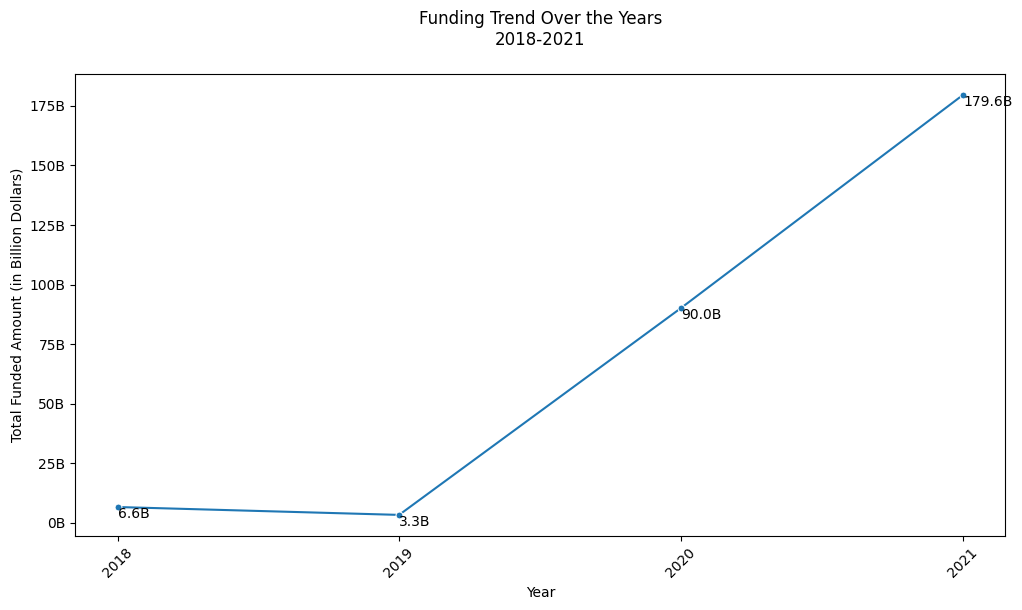

In [63]:
# Plot a line graph to display the trend over the year
funding_trend = df.groupby('year')['amount'].sum()
funding_trend = pd.DataFrame(funding_trend).reset_index()
funding_trend = funding_trend.reset_index()
# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.lineplot(data=funding_trend, x='year', marker='o',markersize=5, y='amount',)
plt.title('Funding Trend Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount (in Billion Dollars)')
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(YearLocator())
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,}'.format(int(x))))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
for i, label in enumerate(funding_trend['amount']):
    year = funding_trend['year'].iloc[i]
    y_value = funding_trend['amount'].iloc[i]
    label_text = f'{label / 1e9:.1f}B' if not pd.isna(label) else 'N/A'
    plt.text(year, y_value, label_text, ha='left', va='top', color='black', fontsize=10)
plt.show()

### **Observations**  
- There was a modest decline in funding amounts between 2018 and 2019. However, from 2019 to 2021, there was a remarkable and abrupt increase, with a substantial difference of over 176 billion between the funding levels in 2019 and 2021. 
- 2021 is by far the best funded year with over 179B in funding

### **Evolution of Funding Trends Across Top Locations Over the Years**

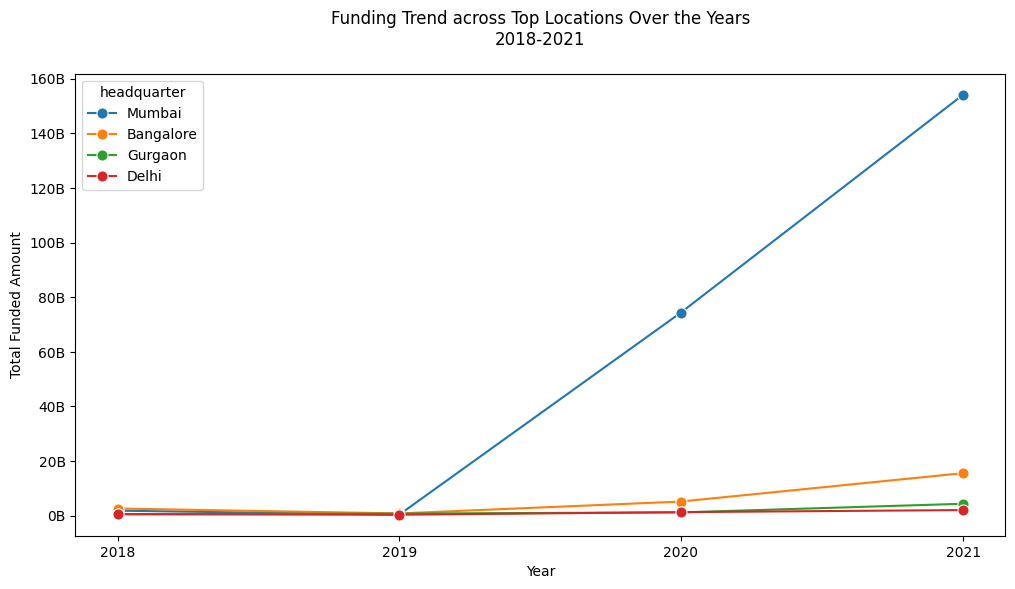

In [64]:
# plot a line graph for the top four funded locations
df['year'] = pd.to_datetime(df['year'], format='%Y')
location_trend = df.groupby(['headquarter', 'year'])['amount'].sum().sort_values(ascending=False)
top_locations = location_trend.groupby('headquarter').sum().nlargest(4).index
# Filter the original DataFrame for the top 5 locations
location_trend_top4 = location_trend[location_trend.index.get_level_values('headquarter').isin(top_locations)].reset_index()
location_trend_top4_reset = location_trend_top4.reset_index()
# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.lineplot(data=location_trend_top4_reset, x='year', y='amount', hue='headquarter', marker='o', markersize=8)
plt.title('Funding Trend across Top Locations Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
ax.xaxis.set_major_locator(YearLocator())
plt.show()

### **Observations**  
- Mumbai stands out as the most well-funded location, exhibiting a funding trend that closely mirrors the overall funding pattern. In contrast, Bangalore, Gurgaon, Delhi and all other cities follow at a considerable distance.


   
     




### **Evolution of Funding Trends Across Top Sectors Over the Years**

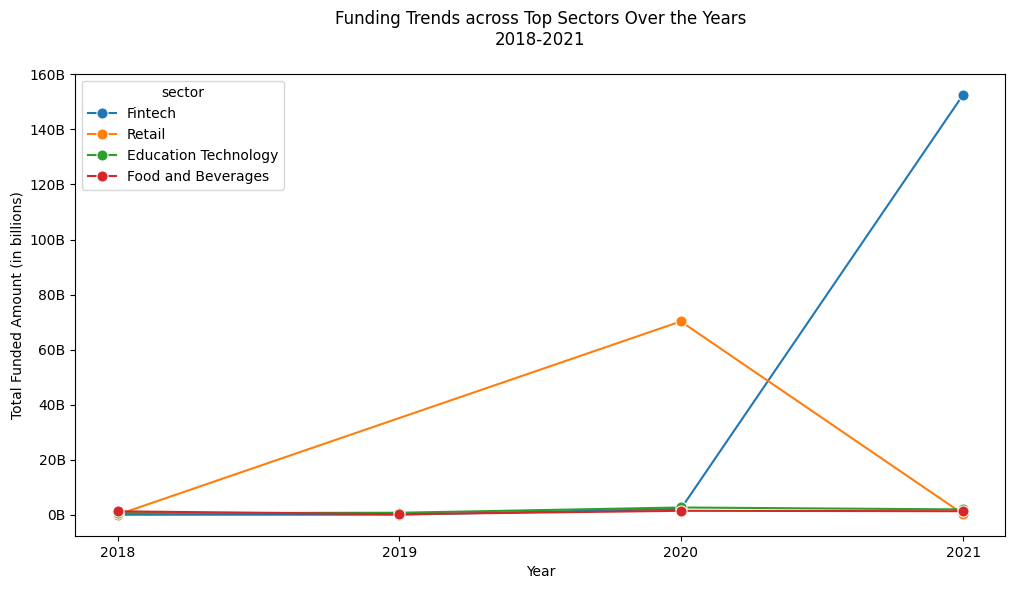

In [65]:
# Plot a line graph to visualize trend of funding across top top_sectors
df['year'] = pd.to_datetime(df['year'], format='%Y')
sector_trend = df.groupby(['sector', 'year'])['amount'].sum().sort_values(ascending=False)
top_sectors = sector_trend.groupby('sector').sum().nlargest(4).index
sector_trend_top4 = sector_trend[sector_trend.index.get_level_values('sector').isin(top_sectors)].reset_index()
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=sector_trend_top4, x='year', y='amount', hue='sector', marker='o', markersize=8)
plt.title('Funding Trends across Top Sectors Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount (in billions)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
ax.xaxis.set_major_locator(YearLocator())
plt.show()

### **Observations**  
- Retail has undergone a notable evolution in its funding trend. Initially, it exhibited a steep upward trajectory until 2020, followed by a sudden decline between 2020 and 2021.

- In contrast, fintech consistently lagged significantly behind retail until 2020, only to experience a sudden upward trajectory thereafter, ultimately emerging as the best-funded sector.




### **Evolution of Funding Trends Across Startup Stages Over the Years**

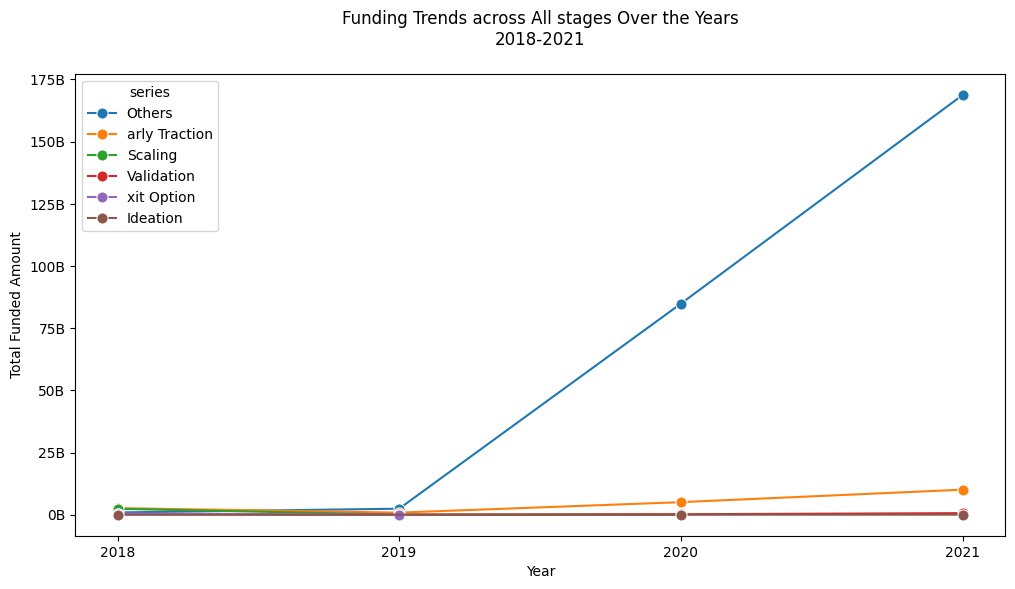

In [75]:
# plot a line graph for the top four funded series
df['year'] = pd.to_datetime(df['year'], format='%Y')
series_trend = df.groupby(['series', 'year'])['amount'].sum().sort_values(ascending=False)
top_series = series_trend.groupby('series').sum().index
# Filter the original DataFrame for the top 4 series
series_trend_top4 = series_trend[series_trend.index.get_level_values('series').isin(top_series)].reset_index()
series_trend_top4_reset = series_trend_top4.reset_index()
# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.lineplot(data=series_trend_top4_reset, x='year', y='amount', hue='series', marker='o', markersize=8)
plt.title('Funding Trends across All stages Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
ax.xaxis.set_major_locator(YearLocator())
plt.show()


### **Observations**
- From the Graph above, Over the years, "Other" category which includes Private Equity, Corporate Round, Undisclosed, Non-equity Assistance, Debt, Bridge, and Edge has seen a tremendous growth in the amount of funding  received. These types of funding are often associated with more mature startups. As the startup ecosystem has matured, investors have become more comfortable investing in later-stage startups that are closer to profitability.

## **2. What is the relationship between the amount of funding and the stage of the company?**

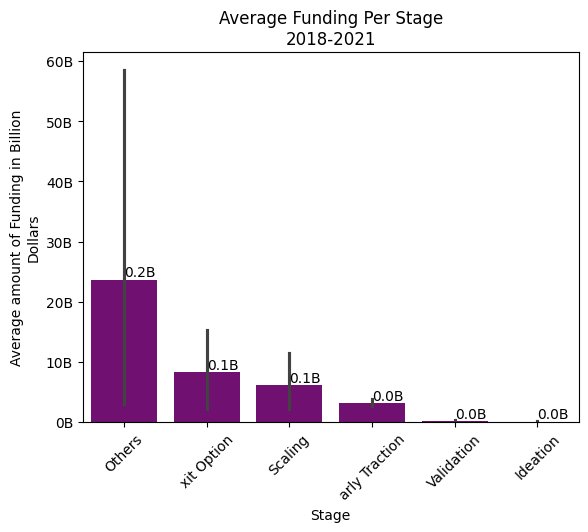

In [76]:
# Assuming 'series' is the categorical variable and 'amount' is the numerical variable
stage_funding_dist = df.groupby('series')['amount'].mean().sort_values(ascending=False)
ax = sns.barplot(x='series', y='amount', data=df, order=stage_funding_dist.index,color='purple')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e7)}B'))
plt.xticks(rotation=45)

# Corrected variable name from 'funding_trend' to 'stage_funding_dist'
for i, label in enumerate(stage_funding_dist):
    year = stage_funding_dist.index[i]
    y_value = stage_funding_dist.iloc[i]
    label_text = f'{y_value / 1e9:.1f}B' if not pd.isna(y_value) else 'N/A'
    ax.text(i, y_value, label_text, ha='left', va='bottom',color='black',fontsize=10)
plt.title('Average Funding Per Stage\n2018-2021')
plt.ylabel('Average amount of Funding in Billion\nDollars')
plt.xlabel('Stage')
plt.show()

### **Observations**  
- Category 'Others' being the best funded stage receives an average of 0.2B in funding  
- Exit option is the second with an average of 01B  
- **A clear trend emerges – the more mature the startup, the more likely it is to attract substantial funding**

In [89]:
# Group by 'series' and calculate the mean amount
stage_funding_dist = df.groupby('series')['amount'].mean().sort_values(ascending=False).reset_index()

# Create a TreeMap visualization
fig = px.treemap(stage_funding_dist, path=['series'], values='amount', title='Average Funding Per Stage',
                 labels={'amount': 'Average amount of Funding in Dollars'},
                 custom_data=['amount'])  # Use custom_data to store the data for labels

# Add text annotations to display data labels
# fig.update_traces(texttemplate='%{customdata[0]:.2s}', textposition='inside')
fig.update_traces(textinfo='label+value')

# Show the plot
fig.show()

### **Observations**
- We can comfortably infer that startups that more muture get more funding

## **3. How does funding vary with the location of the start-ups**


In [90]:
# Top ten most funded locations
location_funding=df.groupby('headquarter')['amount'].mean()
# Group by 'location' and calculate the mean amount
location_funding = df.groupby('headquarter')['amount'].mean().reset_index()

# Create a TreeMap visualization
fig = px.treemap(location_funding, path=['headquarter'], values='amount', title='Average Funding by Location')
fig.update_traces(textinfo='label+value')

# Show the plot
fig.show()

### **Observations**  
- Mumbai's startups get the most money on average. Shanghai gets less, quite a bit behind. It's like a funding showdown between the two cities.
- There's clear variation in funding across different cities. Mumbai, Shanghai, San Francisco, Kalpakkan, and Beijing startups are more likely to secure over $0.2 billion on average.







## **4. Who are the top Investors**

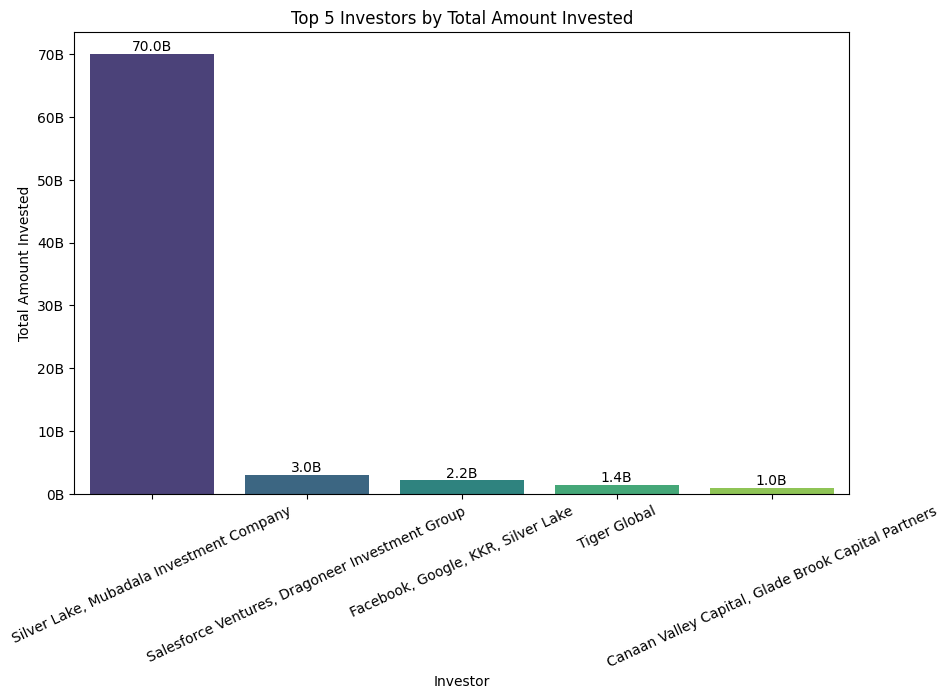

In [70]:
# Identinfy top investors
# Group by 'investor' and calculate the sum of 'amount'
investor_amount = df.groupby('investor')['amount'].sum().reset_index()
top_investors = investor_amount.sort_values(by='amount', ascending=False).head(5)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='investor', y='amount', data=top_investors, palette='viridis')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}B'.format(x / 1e9)))
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height() / 1e9:.1f}B',
            ha='center', va='bottom', fontsize=10, color='black')

plt.title('Top 5 Investors by Total Amount Invested')
plt.xlabel('Investor')
plt.xticks(rotation=25)
plt.ylabel('Total Amount Invested')
plt.show()

### **Observations**
- Silver Lake and Mubadala Investment Company lead all investors, pouring a massive $70 billion into funding. The next closest investor trails far behind at $3 billion.

## **5. What are the most attractive sectors for investors?**


In [ ]:
sectors_funding-